In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder


In [3]:
# Membaca dataset
df = pd.read_csv('iris_dataset.csv')

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.drop(columns=["label"])  # Semua fitur kecuali target
y = df["label"]

In [7]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Membuat model RF
model = RandomForestClassifier(n_estimators=3, random_state=42)

# Melatih model dengan data latih
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=3, random_state=42)

In [10]:
# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 100.00%


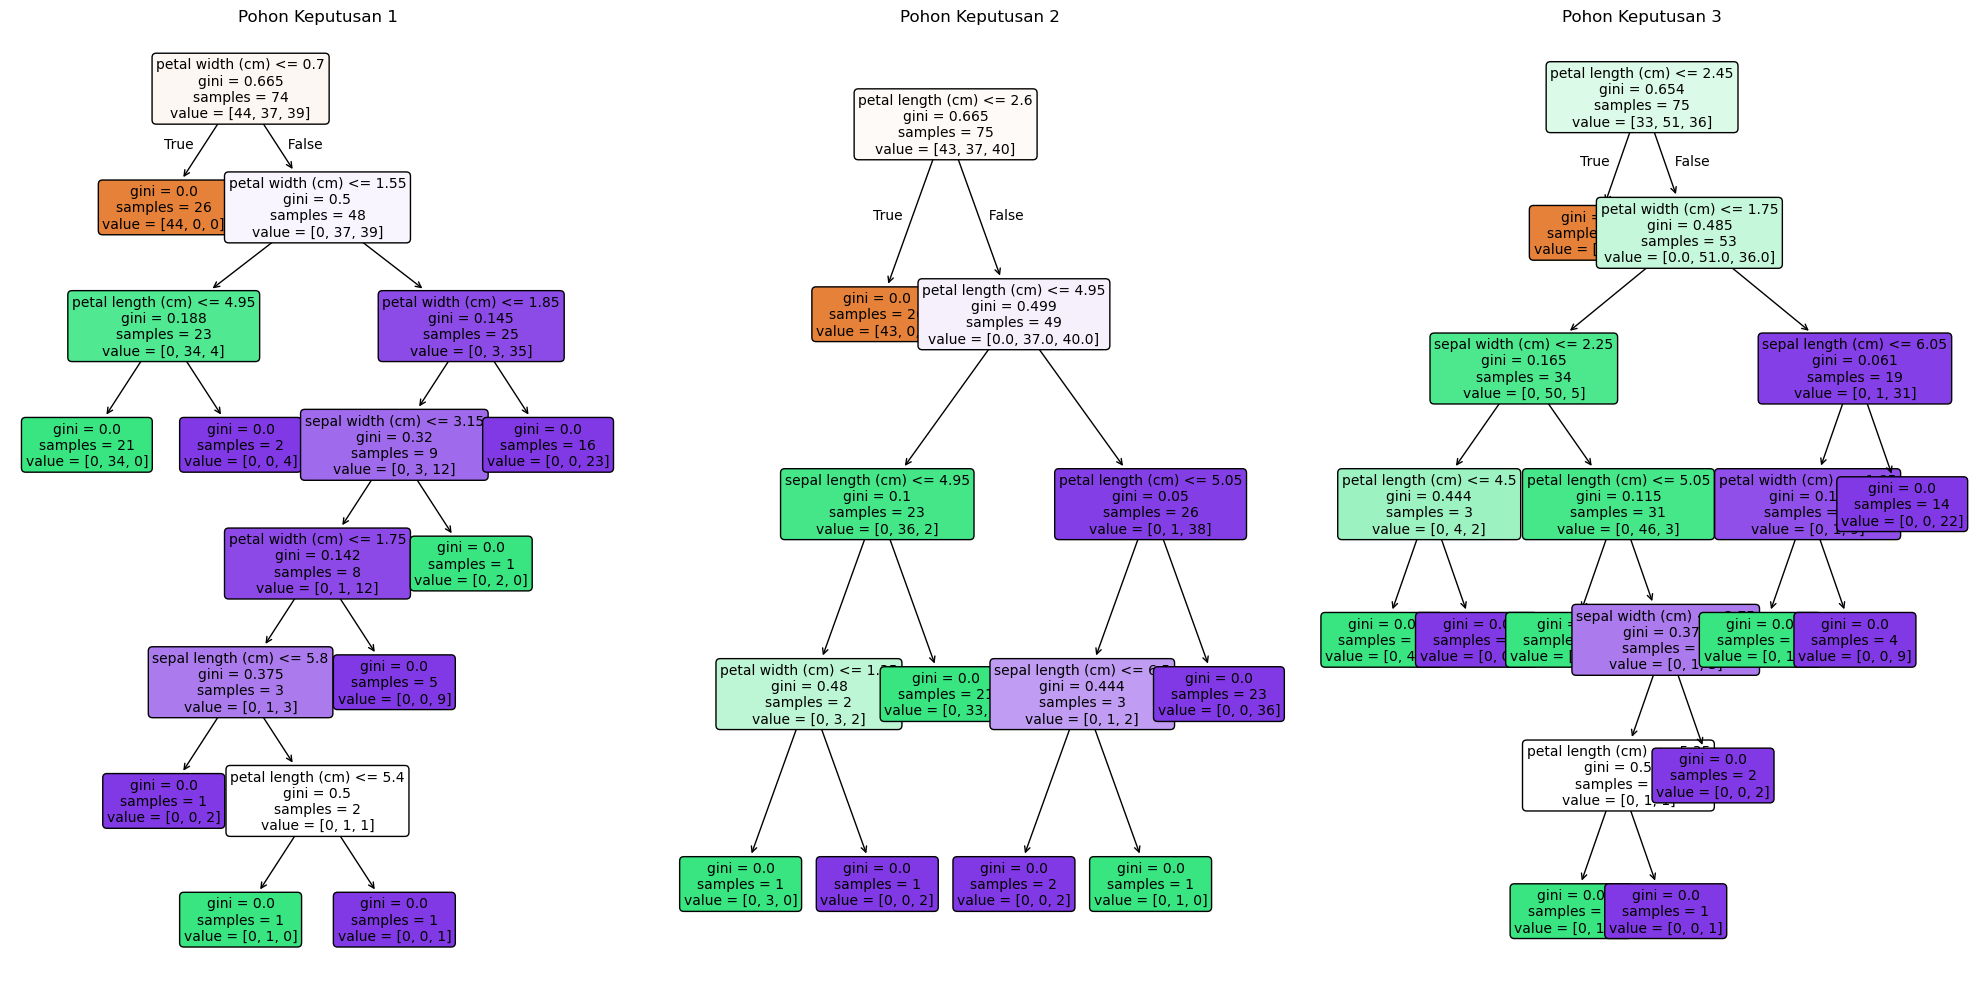

In [11]:
# Pilih tiga pohon dari Random Forest
n_trees = 3  # Jumlah pohon yang ingin ditampilkan
fig, axes = plt.subplots(nrows=1, ncols=n_trees, figsize=(20, 10))

for i in range(n_trees):
    tree_model = model.estimators_[i]
    plot_tree(tree_model, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10, ax=axes[i])
    axes[i].set_title(f"Pohon Keputusan {i+1}")

plt.tight_layout()
plt.show()

In [12]:
# Data baru untuk prediksi
new_data = [[5, 12, 6, 3]]

# Prediksi menggunakan model yang sudah dilatih
prediction = model.predict(new_data)

# Tampilkan hasil prediksi
result = "1" if prediction[0] == 1 else "0"
print(f"Jenis bunga ? {result}")

Jenis bunga ? 0


c:\Users\INFINIX\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
